In [2]:
import cv2

In [2]:
img_file = 'img/girl.jpg'
#img_file = 'img/yoon_nice.jpg'
img = cv2.imread(img_file)        # cv2.imread : path =>  인자로 전달된 경로의 이미지를 읽음
                                   #              flag => 이미지를 읽어들일 방법 (cv2.IMREAD_GRAYSCALE,...)

In [3]:
if img is not None:
    cv2.imshow('IMG',img)         # cv2.imshow : 1st 인자는, image 창의 이름(필수)을, 두번째 인자는 ndarray 형태로 읽어들인 image(필수)
    cv2.waitKey(0)                # cv2.waitKey : 인자로 0 전달 시, Key(키보드)의 입력 이벤트가 발생할때까지 대기
                                  #               인자로, 0 이외의 대기 시간값(miliseconds 단위,int)을 전달해 줄 수 있음
                                  #               return => 대기시간 동안 입력된 키의 ASCII Code 반환 
    cv2.destroyAllWindows()       # cv2.destroyAllWindows : 본 Script 에 의해 생성된 모든 Window 들을 닫음
else:
    print('No Image Read...')
    

In [4]:
print(f'Type of img : {type(img)}')                  # imread 로 읽어들인 이미지는 numpy 의 ndarray 타입
print(f'Shape of img : {img.shape}')                 # image 의 Shape : (Height, Width, Channel)

Type of img : <class 'numpy.ndarray'>
Shape of img : (293, 406, 3)


### 이미지를 GrayScale 로 읽고, 저장해봅시다.

In [3]:
img_file =  'img/girl.jpg'
img = cv2.imread(img_file, cv2.IMREAD_GRAYSCALE)  # 원본 이미지를 Gray Scale 로 Read 합니다.    
print(f'Image Shape : ({img.shape})')             # Gray Scale 이미지는, Channel 이 한개만 존재. 따라서, Height, Width 2가지 요소만 존재 
print(f'Image : ({img})')
#  cv2.imread => flag => 이미지를 읽어들일 방법 지정

'''
flag
 => cv2.IMREAD_GRAYSCALE : 원본 이미지를 흑백화하여 읽어들임
 => cv2.IMREAD_COLOR : 원본 이미지를 컬러 스케일로 읽기, 기본값 (추후 설명)
'''                                                   

Image Shape : ((293, 406))
Image : ([[ 70  66  64 ...  61  66  70]
 [ 69  66  64 ...  63  67  70]
 [ 69  65  64 ...  65  68  70]
 ...
 [ 79  88  98 ... 197 198 199]
 [ 78  88 100 ... 197 199 201]
 [ 76  87  99 ... 200 203 206]])


'\nflag\n => cv2.IMREAD_GRAYSCALE : 원본 이미지를 흑백화하여 읽어들임\n => cv2.IMREAD_COLOR : 원본 이미지를 컬러 스케일로 읽기, 기본값 (추후 설명)\n'

In [6]:
if img is not None:
    cv2.imshow('IMG', img)                
    cv2.waitKey(0)                     
    cv2.destroyAllWindows()
else:
    print('No Image Read...')

In [7]:
save_file ='img/girl_grey.jpg'            # Grayscale 로 변환된 이미지의 저장 경로
cv2.imwrite(save_file,img)                # imwrite => path : 저장할 이미지의 경로
                                          #         => img : 저장될 이미지

True

Grayscale 로 변환된 이미지가 잘 저장되었는지 확인합니다.

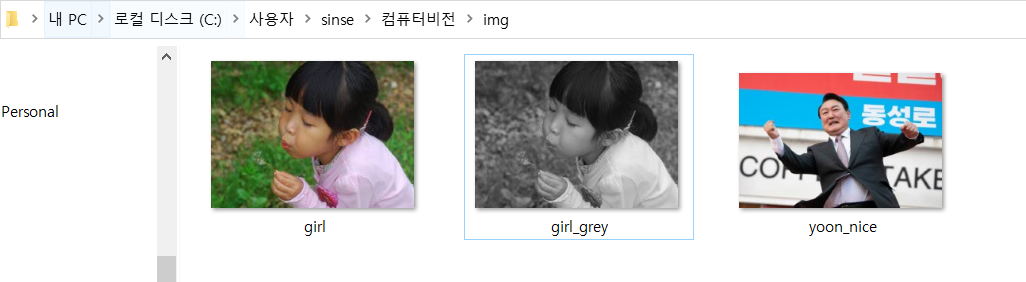

### 이제 동영상 파일을 읽어봅시다.

In [5]:
video_file = 'img/big_buck.avi'               # Read 할 동영상 파일의 경로를 지정

In [9]:
cap = cv2.VideoCapture(video_file)            # 동영상 파일을 구성하는 수많은 이미지들(혹은 Frame)을 빠르게 보여주는 것이, 동영상 재생의 원리
                                              # 따라서,매순간 동영상의 Frame을 캡쳐할 수 있는 Capture 객체 (cv2.VideoCapture 객체) 생성 필요
                                              # cv2.VideoCapture => path : Capture 를 할 대상 동영상파일 지정

In [10]:
if cap.isOpened():                           # isOpened() => Capture 객체가, 대상 동영상/디바이스(웹캠)와 제대로 연결되었는지 확인 (True : 제대로 연결, False : 연결 실패)
    while True:
        ret, img = cap.read()                # VideoCapture.read() => Capture 객체가 다음 Frame 을 읽어들임
                                             #                     returns => bool : Frame 의 읽어들임 성공 여부 반환
                                             #                             => ndarray  : 읽어들인 Frame
        if ret:    
            cv2.imshow(video_file, img)      # 다음 Frame Read 에 성공한 경우, 해당 Frame Window 에 표시
        else:
            break
        key = cv2.waitKey(25)                # 25 miliseconds 의 지연,      
        if key == ord('q'):                  # q 키가 눌렸다면, 동영상 재생 종료
            break
        

else:
    print('Failed to open Video')

cap.release()                                # VideoCapture.release() => Capture 객체에 tied 된 자원(웹캠, 동영상 파일 ..)을 반납 
cv2.destroyAllWindows()

### FPS(Frame Per Second) 와 지연시간의 관계를 알아봅시다.

+ #### FPS
: 초당 프레임(초당 보여지는 영상의 연속적 이미지 개수)이란 뜻으로, 지연시간과는 아래와 같은 관계에 있습니다.
$$ Latency (milisec) = \frac{1000(milisec)}{FPS(Frame/sec)} $$
가령, 어떤 영상이, 1초(=1000 milisec) 동안, 40 개의 Frame(= 연속적image)을 보여준다고 가정했을 때,1개의 Frame 을 보여주는데 25(1000/40) (milisec) 의 시간이 필요하다는 것입니다. 따라서, 동영상의 재생속도(FPS) 에 따라, 적절히, 지연시간을 설정하는 것이 중요합니다.

### Webcam의 FPS 를 구해봅시다.

In [2]:
cap = cv2.VideoCapture(0)       # cv2.VideoCapture 의 인자로 index 를 주는 경우, 디바이스와 연결하여 사용 가능
'''
index 
 => 0 : Web Cam
'''

'\nindex \n => 0 : Web Cam\n'

In [3]:
if cap.isOpened():
    while True:
        ret, img = cap.read()
        if ret:
            cv2.imshow('camera',img)
            if cv2.waitKey(1) != -1:                # cv2.waitKey() 인자는 지정된 대기 시간 동안 Key 입력이 없는 경우, -1 return
                                                    # Webcam 의 경우, 대부분 실시간 영상 출력이 목적이므로, 최대한 지연시간이 짧아야 (FPS 가 높아야) 합니다.
                break
        else:
            print('no frame')
            break
else:
    print('Failed to connect camera')

cap.release()
cv2.destroyAllWindows()    

### Webcam 의 Frame 속성을 제어해봅시다.

In [75]:
cap = cv2.VideoCapture(0)

In [76]:
if cap.isOpened():
    cap.set(cv2.CAP_PROP_FRAME_WIDTH,320)                       # VideoCapture.set => prop : 제어하고자하는 Frame의 속성
                                                                #                  => value : 변경된 속성값
    cap.set(cv2.CAP_PROP_FRAME_HEIGHT,240)
    print(f'frame width : {cap.get(cv2.CAP_PROP_FRAME_WIDTH)}')
    print(f'frame height : {cap.get(cv2.CAP_PROP_FRAME_HEIGHT)}')   
    print(f'frame fps : {cap.get(cv2.CAP_PROP_FPS)}')                 # VideoCapture.get => prop : 알고자하는 Frame의 속성
    
    while True:
        ret, img = cap.read()
        if ret:
            cv2.imshow('camera',img)
            if cv2.waitKey(1) != -1:
                break
        else:
            break
else:
    print('Failed to read image...')

cap.release()
cv2.destroyAllWindows()   

frame width : 320.0
frame height : 240.0
frame fps : 30.0


In [83]:
cap = cv2.VideoCapture(video_file)

In [85]:
def rescale_frame(frame, percent=75):
    '''
        Video File 로부터 읽어온 Frame 은, VideoCapture 객체를 통한 resizing 이 불가 !
        대신, cv2.resize 함수를 사용하여 resizing
        (자세한 사항은 https://stackoverflow.com/questions/57660458/cant-set-frame-width-and-height-with-opencv-cv2-videocapture-set 참고)
    '''
    width = int(frame.shape[1] * percent/ 100)
    height = int(frame.shape[0] * percent/ 100)
    dim = (width, height)
    return cv2.resize(frame, dim)                   # cv2.resize => src : resizing 하고자하는 image
                                                    #             => dim : resizing 후의 image size (tuple)

if cap.isOpened():
    latency =int(1000/cap.get(cv2.CAP_PROP_FPS))
    print(f'frame width : {cap.get(cv2.CAP_PROP_FRAME_WIDTH)}')
    print(f'frame height : {cap.get(cv2.CAP_PROP_FRAME_HEIGHT)}')
    
    while True:
        ret, img = cap.read()
        if ret:
            frame_resized = rescale_frame(img, percent=75)               # 가로 세로의 비율을 55 % 감소
            cv2.imshow(video_file,frame_resized)
            if cv2.waitKey(latency) != -1:
                break
        else:
            break
else:
    print('Failed to read image...')

cap.release()
cv2.destroyAllWindows()    

Failed to read image...


### Webcam 을 통해 이미지를 촬영/저장해봅시다.

In [5]:
cap = cv2.VideoCapture(0)

In [8]:
if cap.isOpened():
    while True:
        ret, img = cap.read()
        if ret:
            cv2.imshow('camera',img)
            if cv2.waitKey(1) != -1:
                cv2.imwrite('img/photo.jpg',img)         # 현재 Frame(Image) 를, img/photo.jpg 경로로 저장
                break
        else:
            break
else:
    print('Failed to connect camera')

cap.release()
cv2.destroyAllWindows()

NameError: name 'cap' is not defined